In [1]:
import os,sys
import numpy as np
import xarray as xr
import zarr

import matplotlib.pyplot as plt

# from dask.distributed import Client
import multiprocessing.popen_spawn_posix
from distributed import Client

c = Client()
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 24.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38241,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:35149,Total threads: 3
Dashboard: http://127.0.0.1:46081/status,Memory: 6.00 GiB
Nanny: tcp://127.0.0.1:33521,


In [2]:
CB_colors = {
	'blue':	'#377eb8',
	'orange':  '#ff7f00',
	'green':   '#4daf4a',
	'pink':	'#f781bf',
	'brown':   '#a65628',
	'purple':  '#984ea3',
	'gray':	'#999999',
	'red': 	'#e41a1c',
	'yellow':  '#dede00'
}

In [9]:
# dir_sc = os.environ['SCRATCH']
# dir_work = os.environ['WORK']
dir_work = '/gws/nopw/j04/isotipic/stajouri/PhD/Jean_Zay_DIRWORK/uor98hu'

# to have some quantification

In [4]:
# partitionning between forced qnd internql for the steric
nexp="ES"
COMP ="STERIC"
dir_base = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/data4analyses/"+nexp+"/"+COMP+"/"
Variance_terms = xr.open_zarr(dir_base+"global_var_terms.zarr")
var_internal = Variance_terms.global_var[2] - Variance_terms.global_var[3]
verif =  (Variance_terms.global_var[1] + var_internal)
forced_perc = (Variance_terms.global_var[1] / Variance_terms.global_var[0] ) *100

In [11]:
forced_perc.mean().values

array(67.88657347)

In [7]:
Variance_terms

<xarray.Dataset>
Dimensions:        (var_term: 4, period_length: 20)
Coordinates:
  * period_length  (period_length) int64 1 3 5 7 9 11 13 ... 29 31 33 35 37 39
  * var_term       (var_term) <U9 'total' 'forced' 'intrinsic' 'bias'
Data variables:
    global_var     (var_term, period_length) float64 dask.array<chunksize=(4, 20), meta=np.ndarray>

# plot final figure all together

In [10]:
def load_plot_ts(nexp,COMP,ax):
    dir_base = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/data4analyses/"+nexp+"/"+COMP+"/"

    Variance_terms = xr.open_zarr(dir_base+"global_var_terms.zarr")
    
    var_internal = Variance_terms.global_var[2] - Variance_terms.global_var[3]
    verif =  (Variance_terms.global_var[1] + var_internal)
    forced_perc = (Variance_terms.global_var[1] / Variance_terms.global_var[0] ) *100

    # --------- plotting
    lim1 = -7
    lim2 = 18
    
    Variance_terms.global_var[0,:].plot(ax=ax,color='k',linewidth=2) # total variance
    Variance_terms.global_var[1,:].plot(ax=ax,color=CB_colors['blue'],linewidth=2) # forced varaince
    var_internal.plot(color=CB_colors['red'],linewidth=2,ax=ax) # internal variance
    # verif.plot(color=CB_colors['red'],linewidth=1, linestyle="--",ax=ax) # verif line
    Variance_terms.global_var[2,:].plot(color='darkgoldenrod',linewidth=2, linestyle ="--",ax=ax) # intrinsic variance
    (Variance_terms.global_var[3,:]*-1).plot(color='orange',linewidth=2,linestyle ="--",ax=ax) # bias term
    
    ax.set_ylim(lim1,lim2)
    ax.set_title('')
    ax.grid()
    ax.axhline(0, color='k')
        
    ax.set_ylabel(None)
    ax.set_xlabel("Time period length")



In [11]:
def load_plot_tsMANO(nexp,COMP,ax):
    dir_base = dir_work + "/ETUDE3/ENS_VAR_BUDGET/data4analyses/data4analyses/"+nexp+"/"+COMP+"/"
    
    Variance_terms = xr.open_zarr(dir_base+"global_var_terms.zarr")
    
    var_internal = Variance_terms.global_var[2] - Variance_terms.global_var[3]
    verif =  (Variance_terms.global_var[1] + var_internal)
    forced_perc = (Variance_terms.global_var[1] / Variance_terms.global_var[0] ) *100

        # --------- plotting
    lim1 = -0.2
    lim2 = 0.8
    
    Variance_terms.global_var[0,:].plot(ax=ax,color='k',linewidth=2) # total variance
    Variance_terms.global_var[1,:].plot(ax=ax,color=CB_colors['blue'],linewidth=2) # forced varaince
    var_internal.plot(color=CB_colors['red'],linewidth=2,ax=ax) # internal variance
    # verif.plot(color=CB_colors['red'],linewidth=1, linestyle="--",ax=ax) # verif line
    Variance_terms.global_var[2,:].plot(color='darkgoldenrod',linewidth=2, linestyle ="--",ax=ax) # intrinsic variance
    (Variance_terms.global_var[3,:]*-1).plot(color='orange',linewidth=2,linestyle ="--",ax=ax) # bias term
    
    ax.set_ylim(lim1,lim2)
    ax.set_title('')
    ax.grid()
    ax.axhline(0, color='k')
        
    ax.set_ylabel(None)
    ax.set_xlabel("Time period length")


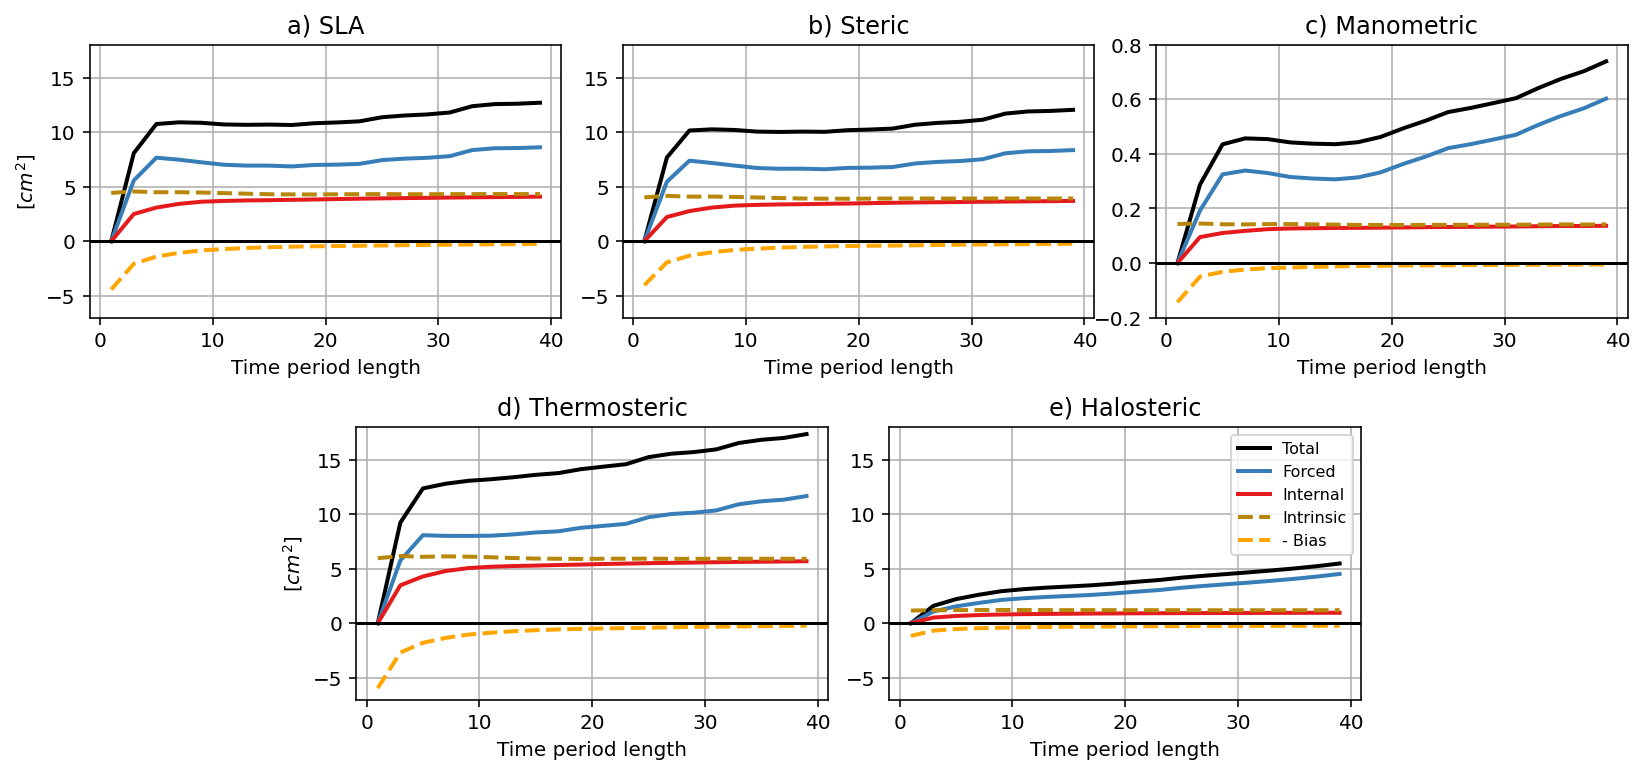

In [13]:
cm = 1/2.54  # centimeters in inches
diro = '/home/users/stajouri/Documents/PLOTS/PhD/'

nexp="ES"

fig= plt.figure(figsize=(35*cm, 15*cm), facecolor='none', dpi=72*2) # 
plt.subplots_adjust(wspace=0.3, hspace=0.4)

ax0 = plt.subplot2grid((2,6), (0,0), colspan=2)
ax1 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,3), colspan=2)

load_plot_ts(nexp,"SLA",ax0)
load_plot_ts(nexp,"STERIC",ax1)
load_plot_tsMANO(nexp,"MANO",ax2)
load_plot_ts(nexp,"THERMO",ax3)
load_plot_ts(nexp,"HALO",ax4)


ax0.set_title("a) SLA")
ax1.set_title("b) Steric")
ax2.set_title("c) Manometric")
ax3.set_title("d) Thermosteric")
ax4.set_title("e) Halosteric")



# ax0.legend(['Total',"Force","Internal", "Verification"], loc="lower right", fontsize=8)
ax0.set_ylabel('[$cm^{2}$]')
ax3.set_ylabel('[$cm^{2}$]')

ax4.legend(['Total',"Forced","Internal",'Intrinsic',"- Bias"], loc="upper right", fontsize=8)


namo="fig_synthetic_global_var_time_series.png"
# plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight', transparent=True) #,edgecolor='none', bbox_inches='tight'
# plt.close(fig)

In [14]:
diro+namo 

'/home/users/stajouri/Documents/PLOTS/PhD/fig_synthetic_global_var_time_series.png'

# the time series en normalisant :

In [10]:
def bias2plot(nexp,COMP):
    dir_base = "/lustre/fswork/projects/rech/cli/uor98hu/ETUDE3/ENS_VAR_BUDGET/data4figure/"+nexp+"/"+COMP+"/"
    # dir_base = "/gpfsscratch/rech/cli/uor98hu/ETUDE3/ENS_VAR_BUDGET/"+nexp+"/"+COMP+"/"

    
    Variance_terms = xr.open_zarr(dir_base+"global_var_terms.zarr")
    bias = Variance_terms.global_var[3,:]*-1  
    bias2plot = bias /bias[0]

    return bias2plot

In [11]:
bias2plotSSH = bias2plot(nexp,"SSH")
bias2plotSTE = bias2plot(nexp,"STERIC")
bias2plotTHER = bias2plot(nexp,"THERMO")
bias2plotHALO = bias2plot(nexp,"HALO")
bias2plotMANO = bias2plot(nexp,"MANO")

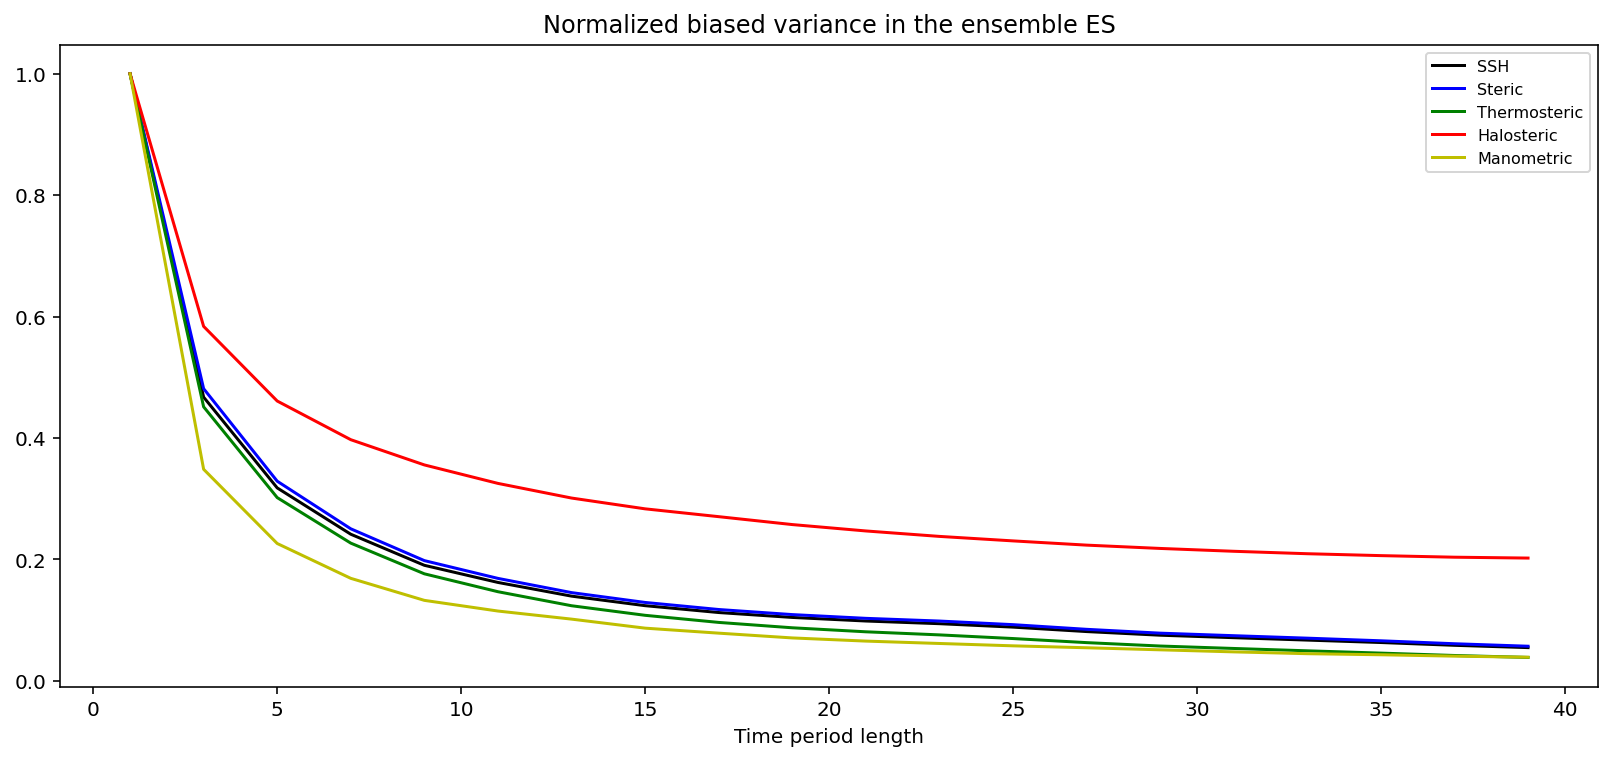

In [21]:
cm = 1/2.54  # centimeters in inches
diro = "/gpfsscratch/rech/cli/uor98hu/ETUDE3/ENS_VAR_BUDGET/PLOTS/"

nexp="ES"

fig,ax0 = plt.subplots(1,1,figsize=(35*cm, 15*cm), facecolor='none', dpi=72*2, sharey=True, sharex=True) # 
plt.subplots_adjust(wspace=0.3, hspace=0.4)

bias2plotSSH.plot(color='k')
bias2plotSTE.plot(color='b')
bias2plotTHER.plot(color='g')
bias2plotHALO.plot(color='r')
bias2plotMANO.plot(color='y')


ax0.set_title("Normalized biased variance in the ensemble ES")
ax0.set_ylabel(None)
ax0.set_xlabel("Time period length")

ax0.legend(['SSH',"Steric","Thermosteric", "Halosteric",'Manometric'], loc="upper right", fontsize=8)


namo="fig_bias_global_var_time_series_normalized.png"
# plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight', transparent=True) #,edgecolor='none', bbox_inches='tight'
# plt.close(fig)


In [22]:
diro+namo

'/gpfsscratch/rech/cli/uor98hu/ETUDE3/ENS_VAR_BUDGET/PLOTS/fig_bias_global_var_time_series_normalized.png'

In [ ]:
/gpfsscratch/rech/cli/uor98hu/ETUDE3/ENS_VAR_BUDGET/PLOTS/fig_bias_global_var_time_series_normalized.png